Reference:
- Yuruyurau's post on X: https://x.com/yuruyurau/status/1943684973199819135

Computing frames...
Creating animation...
Saving GIF...
Animation saved as 'jellyfish.gif'


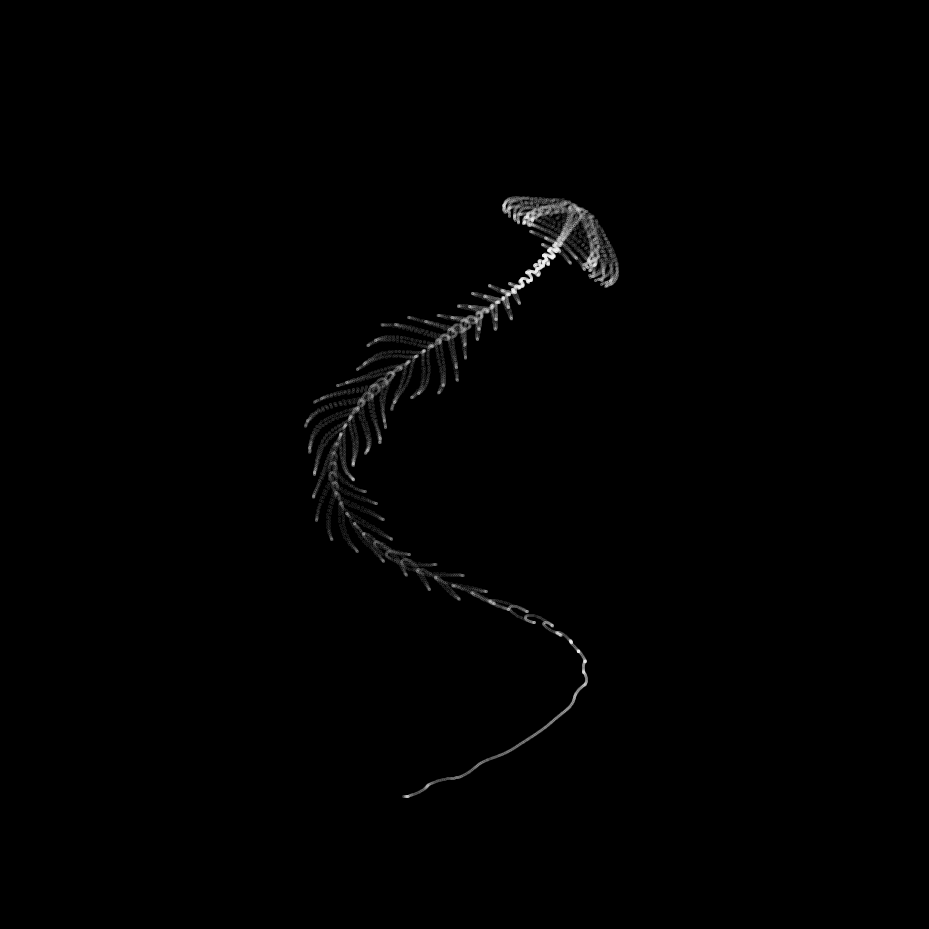

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
from matplotlib.colors import to_rgb

# Set up the figure
fig, ax = plt.subplots(figsize=(6, 6), dpi=150)  # Higher DPI for better quality
fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
ax.set_xlim(0, 400)
ax.set_ylim(400, 0)  # Inverted y-axis to match original
ax.set_aspect('equal')
ax.axis('off')

# Dark background (matches original)
bg_color = to_rgb('#000000')
fig.set_facecolor(bg_color)
ax.set_facecolor(bg_color)

# Precompute all points for animation
num_frames = 150
num_points = 10000
t_values = np.linspace(0, 2*np.pi, num_frames)

# Precompute base values
i_vals = np.arange(num_points)
x = i_vals
y = i_vals / 41.0

# Pre-allocate arrays
xp_all = np.zeros((num_frames, num_points))
yp_all = np.zeros((num_frames, num_points))

# Compute all frames
print("Computing frames...")
for frame_idx, t in enumerate(t_values):
    # Intermediate calculations
    k = 5 * np.cos(x/19) * np.cos(y/30)
    e = y/8 - 12
    d0 = np.sqrt(k**2 + e**2)
    d = (d0**2)/59 + 2
    
    angle = np.arctan2(k, e)  # Equivalent to atan2(k,e)
    q = (4 * np.sin(angle * 9) + 9 * np.sin(d - t) - 
         (k/d) * (9 + 3*np.sin(d*9 - t*16)))
    
    c = (d**2)/7 - t
    xp = q + 50*np.cos(c) + 200
    yp = q*np.sin(c) + d*45 - 9
    
    # Store results with y-inversion
    xp_all[frame_idx] = xp
    yp_all[frame_idx] = yp  # No inversion needed since we flipped y-axis

# Create initial scatter plot
scatter = ax.scatter(xp_all[0], yp_all[0], s=0.1, 
                     color='white', alpha=0.14, rasterized=True)

# Animation update function
def update(frame):
    scatter.set_offsets(np.column_stack((xp_all[frame], yp_all[frame])))
    return [scatter]

# Create animation
print("Creating animation...")
ani = FuncAnimation(fig, update, frames=num_frames, 
                    blit=True, interval=33)

# Save as GIF
print("Saving GIF...")

# Save as GIF
ani.save('jellyfish.gif', 
         writer='pillow',  # Use pillow directly
         fps=30,
         dpi=150,
         savefig_kwargs={'facecolor': bg_color}
         )

print("Animation saved as 'jellyfish.gif'")